# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page the same for the different language users?

## Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [117]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__

'1.11.1'

In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats 

## Reading the Data into a DataFrame

In [194]:
# read the data
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [195]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [196]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observations:
The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the user id.

In [180]:
df.shape

(100, 6)

In [197]:
#the statistical summary for the variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [198]:
#print out a concise summary of data type for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [199]:
df.isnull().sum()


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
There are no missing value in the entire data set.

In [200]:
#Checking for duplicate entries in the data
df.duplicated().sum()

0

#### Observations:
There are no duplicated value in the entire data set.

### Univariate Analysis

##### user_id

In [201]:
df["user_id"].nunique()

100

#### Obervation:
the number is the same as row count, so each number in user_id is unique 

##### group

In [202]:
df["group"].nunique()

2

In [203]:
df["group"].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

#### Obervation:
there are two values in the group, control and treatment with each having 50 number of users

##### landing_page

In [204]:
df["landing_page"].nunique()

2

In [205]:
df["group"].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

#### Observation:
there are two values in the landing page, control and treatment with each having 50 number of land_pages

##### time_spent_on_the_page

In [206]:
df["time_spent_on_the_page"].nunique()

94

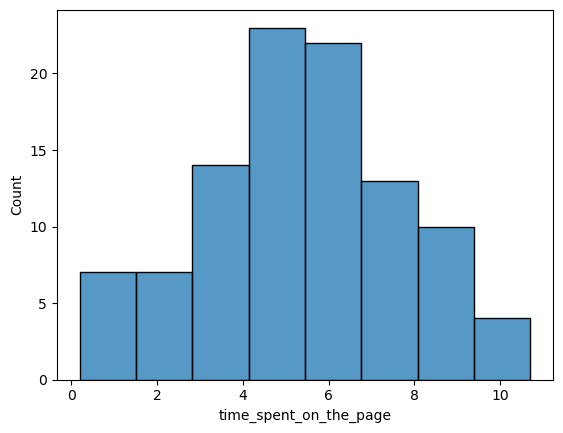

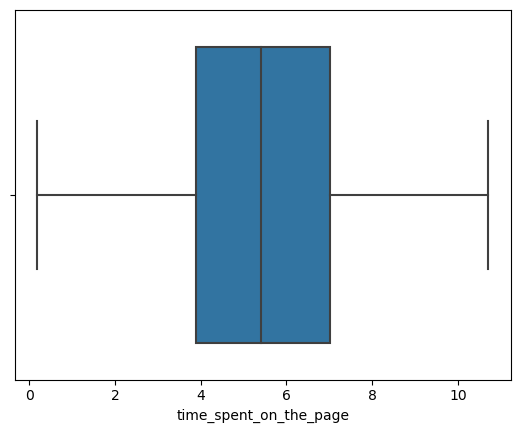

In [134]:
## Histogram for the cost of order
sns.histplot(data=df,x='time_spent_on_the_page') 
plt.show()

 ## Boxplot for the cost of order
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show() 

#### Observation:
 The distribution is nearly normal distribution.
 There are no outliers present in this column. 50% of the time spent are at and below 5.3, with an average at 5.4.

##### converted

In [207]:
df["converted"].nunique()

2

In [208]:
df["converted"].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

#### Observation:
there are two values in the converted category, Yes or No, with each having 54 and 46, respectively.

##### language_preferred

In [209]:
df["language_preferred"].nunique()

3

In [210]:
df["language_preferred"].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

#### Observation:
there are three values in the language column, English, Spanish, and French, with each having 32, 34, and 34, respectively.

### Bivariate Analysis

In [139]:
#correlation among numerical variables 
#Need to get the numerical data only for the analysis
df_numerical = df[['user_id', 'time_spent_on_the_page']]
df_numerical

,user_id,time_spent_on_the_page
0,546592,3.48
1,546468,7.13
2,546462,4.40
3,546567,3.02
4,546459,4.75
...,...,...
95,546446,5.15
96,546544,6.52
97,546472,7.07
98,546481,6.20


#### Observation:
 there are no apparent correlation among these two numerical variables, as user_id is just an unique identifier

#### correlation among numerical and categorical variables (time_spent_on_the_page, but exclusing user_id)

##### landing_page vs time_spent_on_the_page

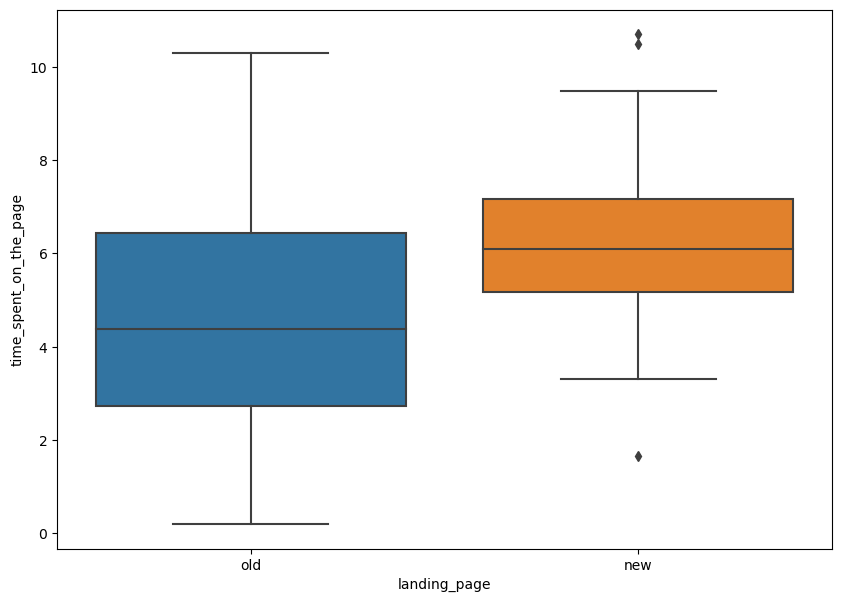

In [140]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

##### Observation:
The time spent on new landing page (6.2 at 50% mart) is longer than those on old landing page (4.5 at 50% mark), the distribution (25% - 75%) is significantly narrower for new landing page than old page, even though there are a few outliner on the new landing page.

##### language_preferred vs time_spent_on_the_page

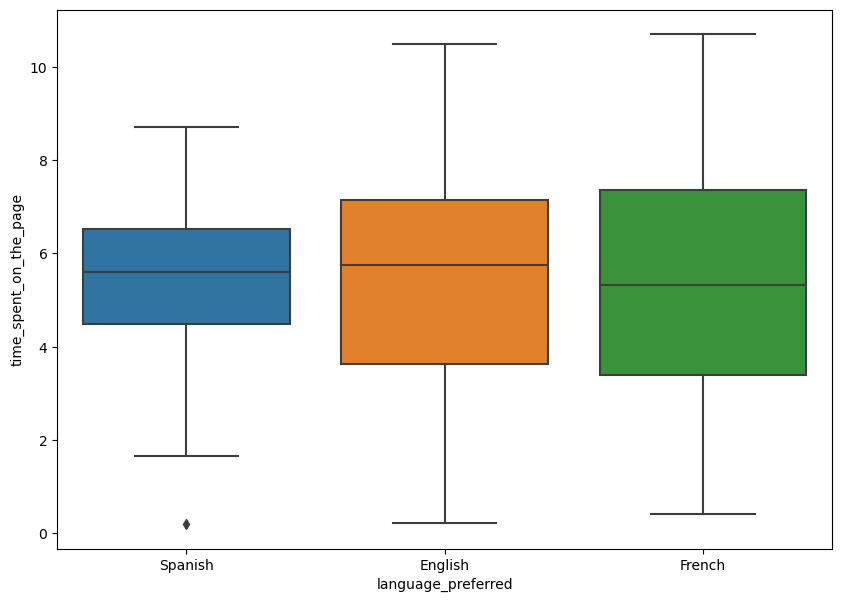

In [141]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

##### Observation:
The time spent for users with English language seems to be slightly longer than those with Spanish and French, the distribution (25% - 75%) for Spanish user is significantly narrower for those with English and French, even though there is one outliner with Spanish speaking users. 

##### converted vs time_spent_on_the_page

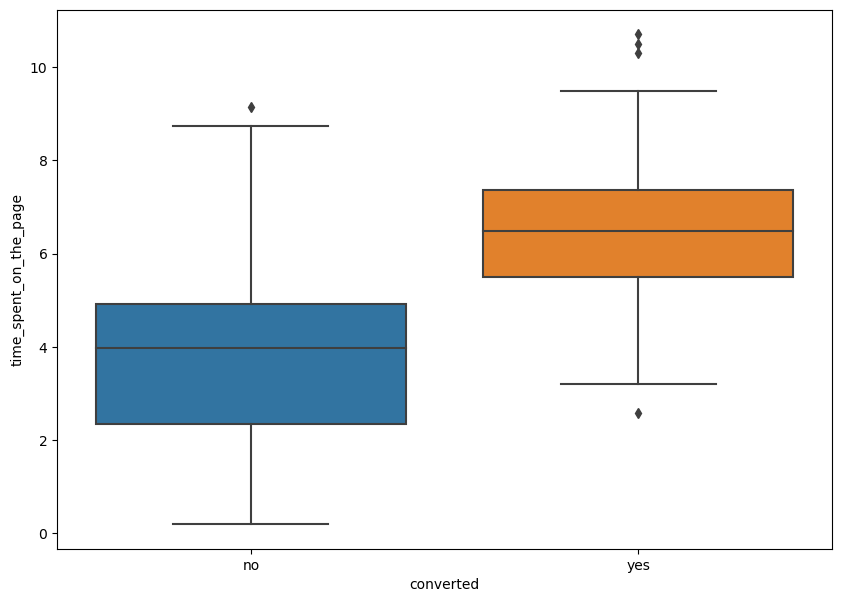

In [142]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

##### Observation:
No surprise, the time spent for converted users (Yes value) is significantly higher than those of non converted users (No value).

##### group vs time_spent_on_the_page

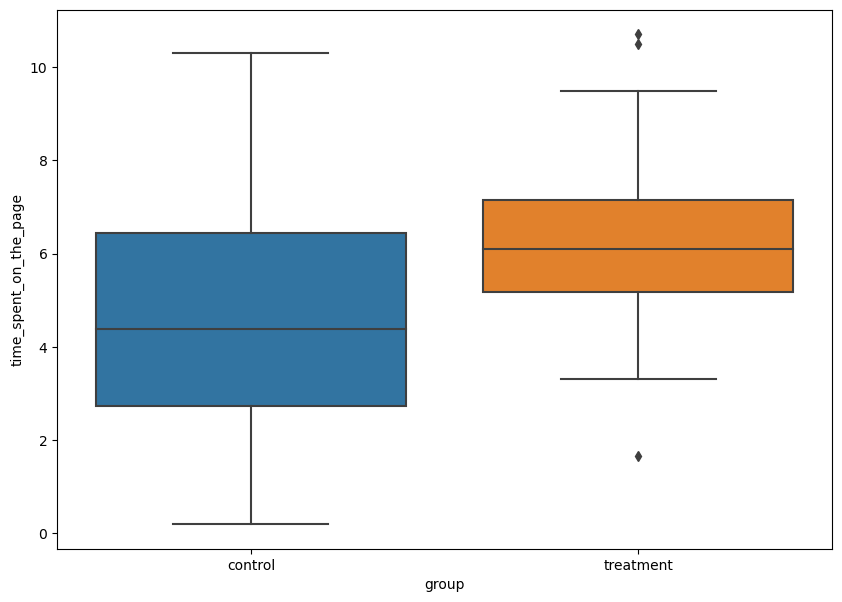

In [143]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x = 'group', y = 'time_spent_on_the_page')
plt.show()

##### Observation:
The time spent for "treatment" group is significantly higher than those of "Control" group users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

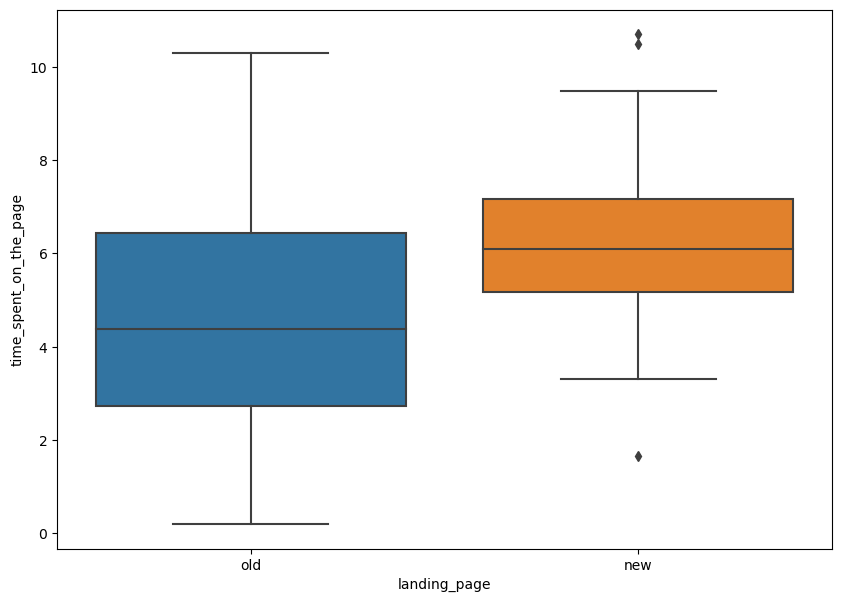

In [144]:
# As show in the above univariate analysis:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

#### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean time spent for **new page** and **old page** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

The ttest_ind() function of Scipy will be used to compute the test statistic and p-value.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05

### Step 4: Collect and prepare data

In [145]:
#create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

#create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']


In [146]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the new page is ' + str(time_spent_new.mean()))
print('The mean time spent on the old page is ' + str(time_spent_old.mean()))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The mean time spent on the new page is 6.2232
The mean time spent on the old page is 4.532400000000001
The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


#### Confirm whether the above T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Therefore, two sample T-test for this problem.

#### Oberservation:
Based on the sample standard deviations of the two groups, 1.82 and 2.58, the two population standard deviations can be assumed to be unequal.

### Step 5: Calculate the p-value

In [147]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [148]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw insight

we do have enough evidence to support the obervation that the users indeed spend more time on the new landing page than the older landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###  Compare the conversion rate for the new page and the conversion rate for the old page by looking at the graph and table data

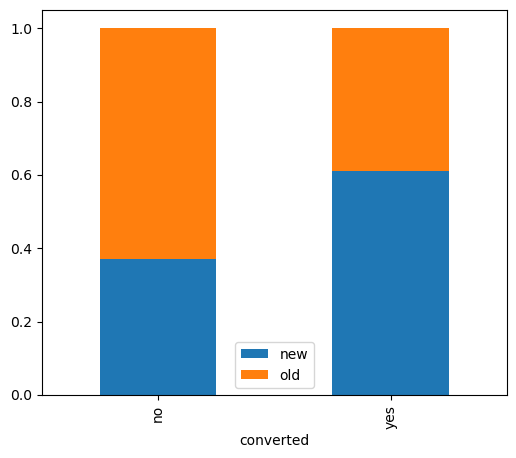

In [149]:

pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,5),stacked=True)
plt.legend()
plt.show()

In [150]:
# Creating a contingency table on landing_pageand and converted
contingency_table1 = pd.crosstab(df['landing_page'], df['converted'])
contingency_table1

converted,no,yes
landing_page,,
new,17,33
old,29,21


In [151]:
# Creating a contingency table on group and converted
contingency_table2 = pd.crosstab(df['group'], df['converted'])
contingency_table2

converted,no,yes
group,,
control,29,21
treatment,17,33


### Step 1: Define the null and alternate hypotheses

Null Hypothesis(H0):The conversion rate for the new page is less than or equal to the conversion rate for the old page 

Alternative Hypothesis(Ha):The conversion rate for the new page is greater than the conversion rate for the old page 

### Step 2: Select Appropriate test

based on the data above, this is one-tailed two-proportion z-test

### Step 3: Decide the significance level

As given in the problem statement, let's select α = 0.05.

### Step 4: Collect and prepare data

In [152]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment'] 
print (new_converted, old_converted, n_control, n_treatment)



33 21 50 50


In [153]:
# calculate the number of converted users using the new landing page 
new_converted1 = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
# calculate the number of converted users using the old landing page 
old_converted1 = df[df['landing_page'] == 'old']['converted'].value_counts()['yes'] 

n_old_page = df.landing_page.value_counts()['old']
n_new_page = df.landing_page.value_counts()['new'] 
print (new_converted1, old_converted1, n_old_page, n_new_page)

33 21 50 50


#### Oberservation:
Based on the analysis above, using either group and landing_page, with converted, it should be the same. Thus in below calculation, I will stay with using 'group'.

### Step 5: Calculate the p-value

In [154]:
from statsmodels.stats.proportion import proportions_ztest

# success counts for each group
convert_successes = [new_converted, old_converted]

# number of trials (or observations) for each group
nobs = [n_treatment, n_control]

# Perform one-tailed two-proportion z-test
z_stat, p_value = proportions_ztest(count=convert_successes, nobs=nobs, alternative='larger')
print (z_stat, p_value)
print('The p-value is', p_value)

2.4077170617153842 0.008026308204056278
The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [155]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw insight

###  Insight:
we do have enough evidence to support the claim that the conversion rate for the new page is greater than the conversion rate for the old page

## 3. Is the conversion and preferred language are independent or related?

### Compare the conversion rate (yes or no) with language preference by looking at the graph 

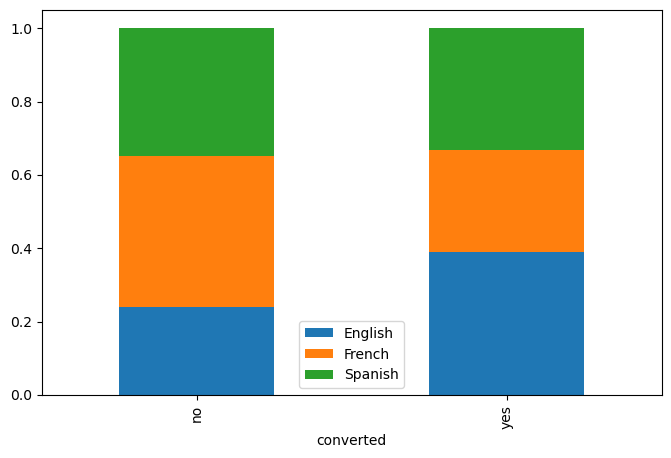

In [156]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(8,5), stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis(H0): There is no association between conversion status and preferred language. 

Alternative Hypothesis(Ha): There is an association between conversion status and preferred language. 

### Step 2: Select Appropriate test

Since this is a problem of the test of independence, concerning two categorical variables, a Chi-squared test of independence will be used.

### Step 3: Decide the significance level

From the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [157]:
# create a contingency table showing the distribution of the two categorical variables
language_conversion_table = pd.crosstab(df['converted'], df['language_preferred'])  

language_conversion_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [158]:
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(language_conversion_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [159]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw insight

We do have enough evidence to support the claim that there is no association between conversion status and preferred language.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [187]:
# Filter the data for users who visited the new page
new_page_data = df[df['landing_page'] == 'new']

# Group by preferred language and calculate the mean time spent

mean_time_by_language = new_page_data.groupby('language_preferred')['time_spent_on_the_page'].mean()

# Display the mean time spent for each language
print(mean_time_by_language)

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


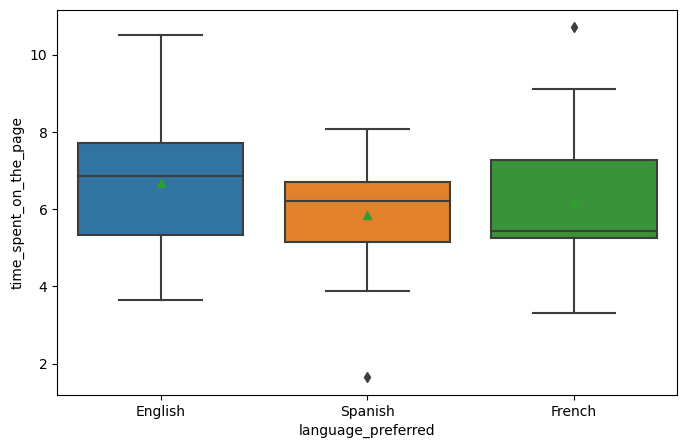

In [161]:
# visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,5))
sns.boxplot(x ='language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = new_page_data)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis(H0): The mean time spent on the new page is the same for all language groups.

Alternative Hypothesis(Ha): At least one language group has a different mean time spent on the new page.

### Step 2: Select Appropriate test

Since this is a problem with three population means, we can perform an Analysis of Variance (ANOVA) test

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [162]:
time_spent_English = new_page_data[new_page_data['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = new_page_data[new_page_data['language_preferred']=="French"]['time_spent_on_the_page']  
time_spent_Spanish = new_page_data[new_page_data['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [211]:

from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish) 

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [193]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw insight

The mean time spent on the new page is about the same for all language groups as there is no statistically significant difference in the time spent on the new landing page among users who prefer different languages. This indicates that the landing page is equally engaging or effective across these language groups, at least in terms of the time spent.

## Conclusion and Business Recommendations

The Dataset from Abtest has been analyzed to understand the variable correlations and trend of categories, which can be beneficial for the company. With the help of descriptive analysis, visualisations, and hypothesis testing, some insights have been drawn as below:

1. There are a total of 6 columns, with 2 numeical and 4 categorical variables, in the dataset.
2. The data is clean, there are no missing values in the entire dataset and there no duplicated values in the dataset.
3. Users spend more time on the new landing page than on the old landing page. The new page appears to be more engaging or holds the visitors' attention longer than the old page.
4. The conversion rate for the new page is greater than the conversion rate for the old page
5. The analysis has shown that there is no association between conversion status and preferred language, it suggests that the likelihood of a user converting is independent of the language they prefer. 
6. There is no statistically significant difference in the time spent on the new landing page among users who prefer different languages. This indicates that the landing page is equally engaging or effective across these language groups, at least in terms of the time spent.

Recommendations:
1. It suggests that the new landing page has elements that are more appealing or relevant to the visitors, leading to increased time spent on the page. This could be better content, more user-friendly design, or other engaging features that warrant further exploration and analysis.
2. It is recommended for the business to consider the factors contributing to the higher conversion rate of the new page and possibly prioritize its use over the old page. Additionally, understanding the elements that make the new page more effective could provide insights for further optimization of the website and its content. 
3. Since the analysis has shown that there is no association between conversion status and preferred language, the strategies might not need to be heavily focused on language-specific customization for conversion optimization. Instead, focus on creating a universally appealing website design and content. Since language preference does not significantly impact conversion, it's beneficial to have a design that is broadly appealing and ensures that key conversion elements (like call-to-actions and value propositions) are clear, concise, and culturally neutral. Although language may not impact conversion, it's still crucial to provide an inclusive user experience. 


___